<a href="https://colab.research.google.com/github/Ashutosh-Gairola/DL/blob/main/mc_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# #1 ANN (Fully connected/ dense layers)

In [30]:
import numpy as np
import keras # keras is available as independent as well as on both Tensorflow and anaconda
from keras.datasets import mnist # inbuilt dataset in keras
import matplotlib.pyplot as plt

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # this will download the data on cache memory

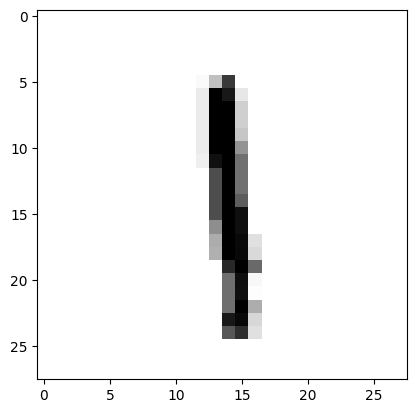

In [32]:
plt.imshow(x_train[8],cmap=plt.cm.binary) # 2nd arguement will make the image black

In [33]:
print(y_train[8])
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

1
3
(60000, 28, 28)
uint8


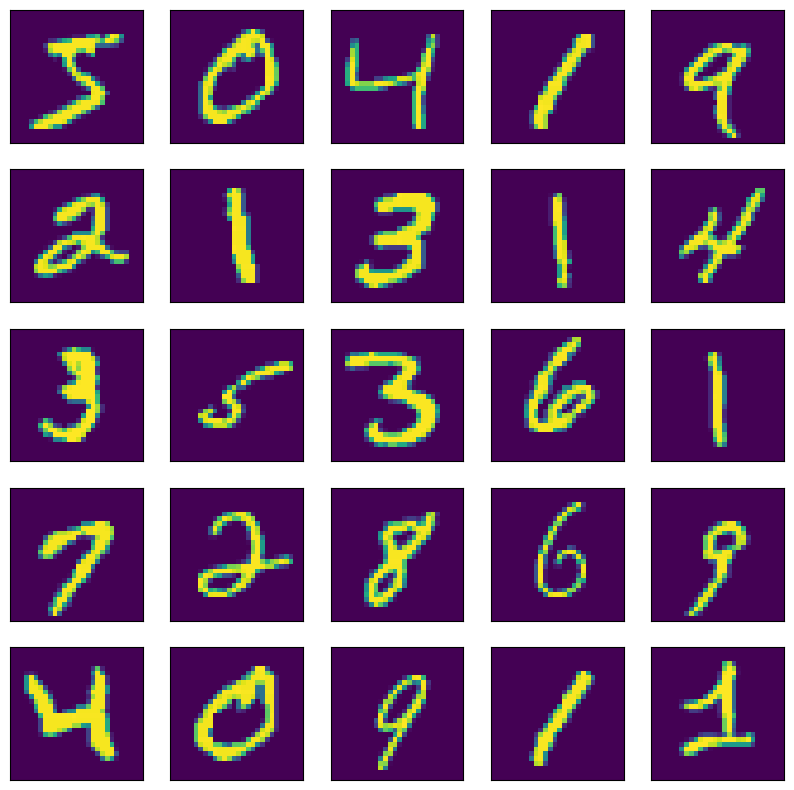

In [34]:
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(x_train[i])
 #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [35]:
# reshape can be aplied before using .astype() above
x_train = x_train.reshape(60000, 784) # alternative: (60000, 28,28) # 28x28=784
x_test = x_test.reshape(10000, 784) # alternative: (60000, 28,28)

In [36]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [37]:
# Normalize pixel values to be between 0 and 1
x_train /= 255 # x_train = x_train/255
x_test /= 255

In [38]:
# y_train & y_test: numerical to categorical
from keras.utils import to_categorical
nb_classes = 10 # number of unique digits
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

In [39]:
# create the model
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential() #sequentially add on layers to create your NN model i.e. groups a linear stack of layers into a model
# adding 3 dense layers
model.add(Dense(512, activation='sigmoid', input_shape=(784,))) # 1st layer #layer with 20 neurons # activation: relu # 784 is no. of columns # default activation ft: linear
model.add(Dense(64, activation='sigmoid', input_shape=(512,)))
model.add(Dense(10, activation='softmax')) # softmax in last/output layer if it's a classification prob
model.summary()
#print(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 435402 (1.66 MB)
Trainable params: 435402 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) #adam
# loss: binary_crossentropy, SparseCategoricalCrossentropy
# train the model with the data
# history=model.fit(x_train, Y_train, batch_size=500, epochs=50) # batch_size=100, epochs=20 # additional argument: verbose=1, validation_data=(x_test, Y_test)
# history=model.fit(x_train, Y_train, batch_size=500, epochs=150)
history=model.fit(x_train, Y_train, batch_size=100, epochs=150)

Epoch 1/150
600/600 [==============================] - 5s 7ms/step - loss: 2.2657 - accuracy: 0.2190
Epoch 2/150
600/600 [==============================] - 5s 9ms/step - loss: 2.1473 - accuracy: 0.4925
Epoch 3/150
600/600 [==============================] - 5s 8ms/step - loss: 1.9815 - accuracy: 0.6105
Epoch 4/150
600/600 [==============================] - 5s 8ms/step - loss: 1.7465 - accuracy: 0.6697
Epoch 5/150
600/600 [==============================] - 5s 9ms/step - loss: 1.4733 - accuracy: 0.7092
Epoch 6/150
600/600 [==============================] - 5s 8ms/step - loss: 1.2256 - accuracy: 0.7452
Epoch 7/150
600/600 [==============================] - 6s 10ms/step - loss: 1.0375 - accuracy: 0.7709
Epoch 8/150
600/600 [==============================] - 5s 8ms/step - loss: 0.9025 - accuracy: 0.7950
Epoch 9/150
600/600 [==============================] - 5s 8ms/step - loss: 0.8036 - accuracy: 0.8111
Epoch 10/150
600/600 [==============================] - 6s 10ms/step - loss: 0.7283 - accu

dict_keys(['loss', 'accuracy'])


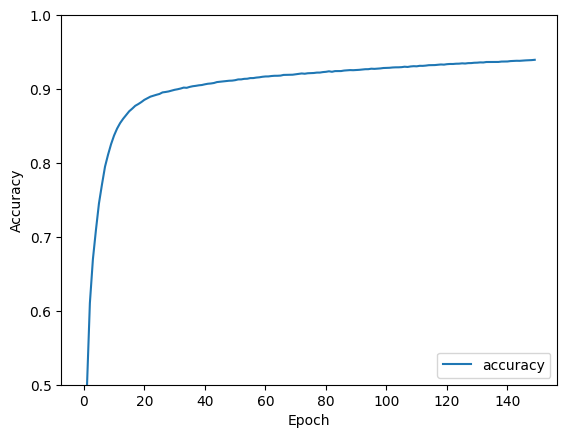

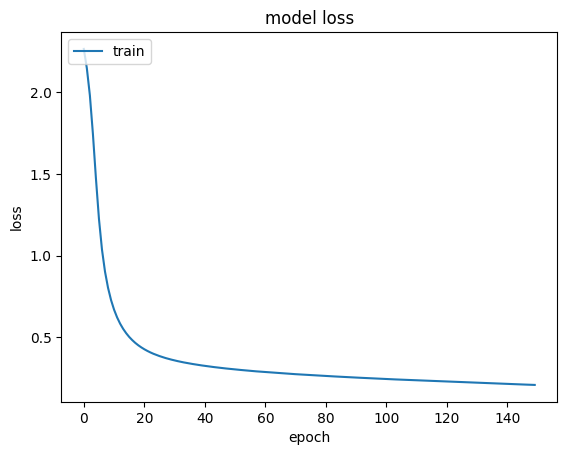

In [41]:
print(history.history.keys())
# accuracy
plt.plot(history.history['accuracy'], label='accuracy') # label is optional
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
#plt.title('model accuracy')
plt.legend(loc='lower right')
#plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
test_loss, test_acc = model.evaluate(x_test, Y_test) # additional srgument: verbose=2 # loss and acc for each epoch is outputted
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9378
Test loss: 0.20848652720451355
Test accuracy: 0.9377999901771545
